In [1]:
import csv
import requests
from bs4 import BeautifulSoup

# Send a GET request to the IMDb URL
url = 'https://www.imdb.com/list/ls026690821/'
response = requests.get(url)

if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find movie details
    movies = []
    for movie in soup.find_all('div', class_='lister-item-content'):
        name = movie.find('a').text.strip()  # Movie name
        release_year = movie.find('span', class_='lister-item-year').text.strip('()')  # Release year
        rating_element = movie.find('span', class_='ipl-rating-star__rating')  # Rating element
        rating = rating_element.text.strip() if rating_element else 'N/A'  # Rating (handle NoneType)
        
        votes_element = movie.find('span', attrs={'name': 'nv'})  # Votes element
        votes = votes_element['data-value'] if votes_element else 'N/A'  # Votes (handle NoneType)
        
        gross_element = movie.find('span', text='Gross:')  # Gross element
        gross = gross_element.find_next_sibling('span').text if gross_element else 'N/A'  # Gross
        
        movies.append({
            'Name': name,
            'Release Year': release_year,
            'Rating': rating,
            'Votes': votes,
            'Gross': gross
        })
    
    # Save the data to a CSV file
    csv_file = 'Marvel_Studios_Movies.csv'
    csv_columns = ['Name', 'Release Year', 'Rating', 'Votes', 'Gross']
    with open(csv_file, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=csv_columns)
        writer.writeheader()
        for movie in movies:
            writer.writerow(movie)
    
    print(f'Successfully saved the data to {csv_file}')
else:
    print('Failed to fetch the webpage')


Successfully saved the data to Marvel_Studios_Movies.csv


C:\Users\adity\AppData\Local\Temp\ipykernel_37340\3391380945.py:24: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  gross_element = movie.find('span', text='Gross:')  # Gross element


In [2]:
import pandas as pd 
df = pd.read_csv('Marvel_Studios_Movies.csv')

In [3]:
df.head(10)

,Name,Release Year,Rating,Votes,Gross
0,Iron Man,2008,7.9,1117170.0,$318.41M
1,The Incredible Hulk,2008,6.6,520508.0,$134.52M
2,Iron Man 2,2010,6.9,862778.0,$312.43M
3,Thor,2011,7.0,895002.0,$181.03M
4,Captain America: The First Avenger,2011,6.9,891439.0,$176.65M
5,The Avengers,2012,8.0,1451984.0,$623.28M
6,Iron Man Three,2013,7.1,894085.0,$409.01M
7,Thor: The Dark World,2013,6.8,720710.0,$206.36M
8,Captain America: The Winter Soldier,2014,7.7,893770.0,$259.77M
9,Guardians of the Galaxy,2014,8.0,1264977.0,$333.18M


In [4]:
df.tail(10)

,Name,Release Year,Rating,Votes,Gross
28,Eternals,2021,6.3,382018.0,$164.87M
29,Thor: Love and Thunder,2022,6.2,395462.0,$343.26M
30,Spider-Man: No Way Home,2021,8.2,866114.0,$804.75M
31,Ant-Man and the Wasp: Quantumania,2023,6.1,223293.0,$214.50M
32,The Marvels,2023,5.6,111416.0,NaN
33,The Fantastic Four,2025,NaN,NaN,NaN
34,Blade,2025,NaN,NaN,NaN
35,Thunderbolts,2025,NaN,NaN,NaN
36,Captain America: Brave New World,2025,NaN,NaN,NaN
37,Deadpool & Wolverine,2024,NaN,NaN,NaN


In [5]:
df.loc[32, 'Gross'] = '$206M'

In [6]:
df.tail(10)

,Name,Release Year,Rating,Votes,Gross
28,Eternals,2021,6.3,382018.0,$164.87M
29,Thor: Love and Thunder,2022,6.2,395462.0,$343.26M
30,Spider-Man: No Way Home,2021,8.2,866114.0,$804.75M
31,Ant-Man and the Wasp: Quantumania,2023,6.1,223293.0,$214.50M
32,The Marvels,2023,5.6,111416.0,$206M
33,The Fantastic Four,2025,NaN,NaN,NaN
34,Blade,2025,NaN,NaN,NaN
35,Thunderbolts,2025,NaN,NaN,NaN
36,Captain America: Brave New World,2025,NaN,NaN,NaN
37,Deadpool & Wolverine,2024,NaN,NaN,NaN


In [7]:
 df.drop(df.index[33:37+1])

,Name,Release Year,Rating,Votes,Gross
0,Iron Man,2008,7.9,1117170.0,$318.41M
1,The Incredible Hulk,2008,6.6,520508.0,$134.52M
2,Iron Man 2,2010,6.9,862778.0,$312.43M
3,Thor,2011,7.0,895002.0,$181.03M
4,Captain America: The First Avenger,2011,6.9,891439.0,$176.65M
5,The Avengers,2012,8.0,1451984.0,$623.28M
6,Iron Man Three,2013,7.1,894085.0,$409.01M
7,Thor: The Dark World,2013,6.8,720710.0,$206.36M
8,Captain America: The Winter Soldier,2014,7.7,893770.0,$259.77M
9,Guardians of the Galaxy,2014,8.0,1264977.0,$333.18M


In [8]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('Marvel_Studios_Movies.csv', index=False)

# Print a message to confirm the CSV file has been saved
print("Cleaned data saved to 'Marvel_Studios_Movies.csv'")

Cleaned data saved to 'Marvel_Studios_Movies.csv'


In [9]:
df['Rating'].mean()

7.239393939393939

In [10]:
df.groupby('Release Year').size()

Release Year
2008    2
2010    1
2011    2
2012    1
2013    2
2014    2
2015    2
2016    2
2017    3
2018    3
2019    3
2021    4
2022    3
2023    3
2024    1
2025    4
dtype: int64

In [11]:
df['Votes'].mean()

724594.2121212122

In [12]:
df['Rating'].corr(df['Release Year'])

-0.22187066933001579

In [13]:
df['Rating'].corr(df['Votes'])

0.7583279645370631

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Sort the DataFrame by 'Rating' column in descending order
sorted_df = df.sort_values(by='Rating', ascending=False)
sorted_df 

# Select the top 10 entries
top_10_movies = sorted_df.head(10)
top_10_movies

,Name,Release Year,Rating,Votes,Gross
21,Avengers: Endgame,2019,8.4,1251317.0,$858.37M
18,Avengers: Infinity War,2018,8.4,1189136.0,$678.82M
30,Spider-Man: No Way Home,2021,8.2,866114.0,$804.75M
9,Guardians of the Galaxy,2014,8.0,1264977.0,$333.18M
5,The Avengers,2012,8.0,1451984.0,$623.28M
0,Iron Man,2008,7.9,1117170.0,$318.41M
23,Guardians of the Galaxy Vol. 3,2023,7.9,371717.0,$359.00M
16,Thor: Ragnarok,2017,7.9,809950.0,$315.06M
12,Captain America: Civil War,2016,7.8,843812.0,$408.08M
8,Captain America: The Winter Soldier,2014,7.7,893770.0,$259.77M


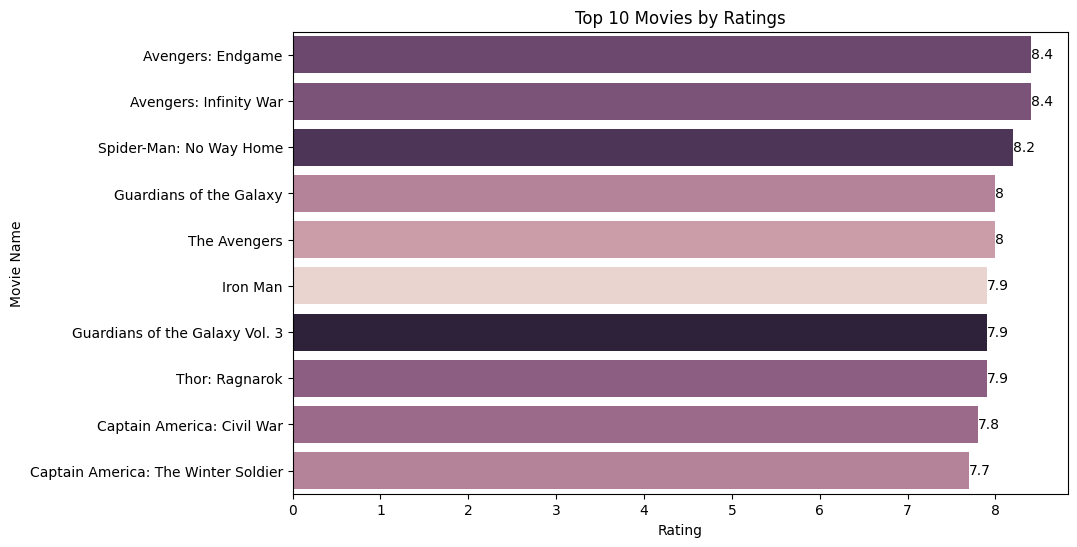

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Rating' column in descending order
sorted_df = df.sort_values(by='Rating', ascending=False)

# Select the top 10 entries
top_10_movies = sorted_df.head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Rating', y='Name', hue='Release Year', legend=False, data=top_10_movies)

# Annotate ratings inside the bars
for i in ax.containers:
    ax.bar_label(i,)

# Set plot title and labels
plt.title('Top 10 Movies by Ratings')
plt.xlabel('Rating')
plt.ylabel('Movie Name')

# Show plot
plt.show()


In [17]:
# Sort the DataFrame by 'Votes' column in descending order
sorted_df = df.sort_values(by='Votes', ascending=False)
sorted_df

# Select the top 10 entries
top_10_movies = sorted_df.head(10)
top_10_movies

,Name,Release Year,Rating,Votes,Gross
5,The Avengers,2012,8.0,1451984.0,$623.28M
9,Guardians of the Galaxy,2014,8.0,1264977.0,$333.18M
21,Avengers: Endgame,2019,8.4,1251317.0,$858.37M
18,Avengers: Infinity War,2018,8.4,1189136.0,$678.82M
0,Iron Man,2008,7.9,1117170.0,$318.41M
10,Avengers: Age of Ultron,2015,7.3,915539.0,$459.01M
3,Thor,2011,7.0,895002.0,$181.03M
6,Iron Man Three,2013,7.1,894085.0,$409.01M
8,Captain America: The Winter Soldier,2014,7.7,893770.0,$259.77M
4,Captain America: The First Avenger,2011,6.9,891439.0,$176.65M


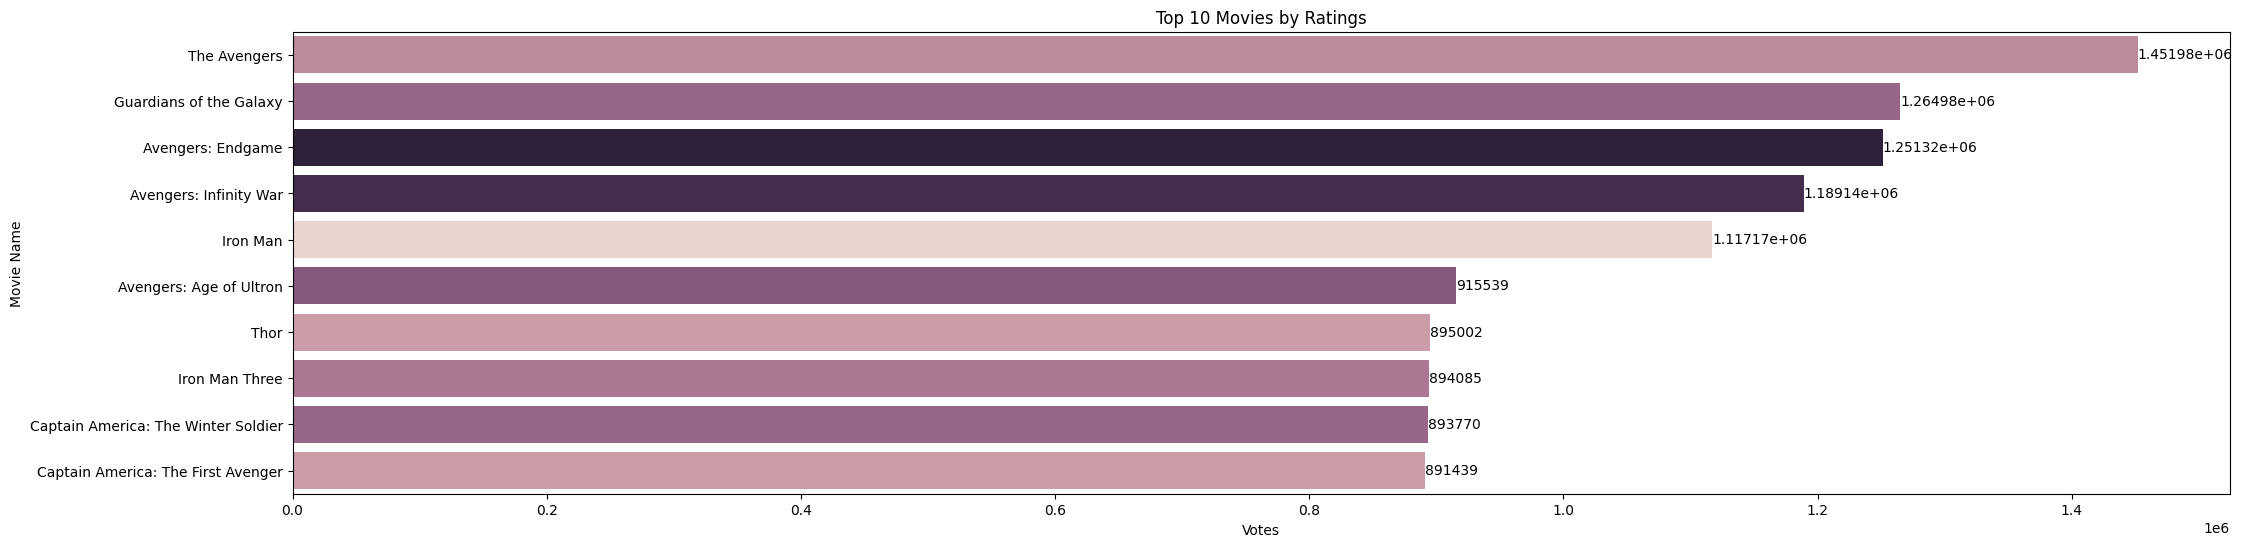

In [18]:
# Sort the DataFrame by 'Votes' column in descending order
sorted_df = df.sort_values(by='Votes', ascending=False)

# Select the top 10 entries
top_10_movies = sorted_df.head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(25, 6))  # Adjust figure size if needed
ax = sns.barplot(x='Votes', y='Name', hue='Release Year', legend=False, data=top_10_movies)

# Annotate ratings inside the bars
for i in ax.containers:
    ax.bar_label(i,)

# Set plot title and labels
plt.title('Top 10 Movies by Ratings')
plt.xlabel('Votes')
plt.ylabel('Movie Name')

# Show plot
plt.show()

In [19]:
# Sort the DataFrame by 'Gross' column in descending order
sorted_df = df.sort_values(by='Gross', ascending=False)
sorted_df

# Select the top 10 entries
top_10_movies = sorted_df.head(10)
top_10_movies

,Name,Release Year,Rating,Votes,Gross
21,Avengers: Endgame,2019,8.4,1251317.0,$858.37M
30,Spider-Man: No Way Home,2021,8.2,866114.0,$804.75M
17,Black Panther,2018,7.3,831476.0,$700.06M
18,Avengers: Infinity War,2018,8.4,1189136.0,$678.82M
5,The Avengers,2012,8.0,1451984.0,$623.28M
10,Avengers: Age of Ultron,2015,7.3,915539.0,$459.01M
26,Black Panther: Wakanda Forever,2022,6.7,300724.0,$453.72M
20,Captain Marvel,2019,6.8,606019.0,$426.83M
27,Doctor Strange in the Multiverse of Madness,2022,6.9,471766.0,$411.33M
6,Iron Man Three,2013,7.1,894085.0,$409.01M


In [20]:
movies_between_2014_to_2018 = df[(df['Release Year'] >= 2014) & (df['Release Year'] <= 2018)]
movies_between_2014_to_2018

,Name,Release Year,Rating,Votes,Gross
8,Captain America: The Winter Soldier,2014,7.7,893770.0,$259.77M
9,Guardians of the Galaxy,2014,8.0,1264977.0,$333.18M
10,Avengers: Age of Ultron,2015,7.3,915539.0,$459.01M
11,Ant-Man,2015,7.2,717238.0,$180.20M
12,Captain America: Civil War,2016,7.8,843812.0,$408.08M
13,Doctor Strange,2016,7.5,798144.0,$232.64M
14,Guardians of the Galaxy Vol. 2,2017,7.6,753428.0,$389.81M
15,Spider-Man: Homecoming,2017,7.4,713148.0,$334.20M
16,Thor: Ragnarok,2017,7.9,809950.0,$315.06M
17,Black Panther,2018,7.3,831476.0,$700.06M


In [21]:
# Filter movies released between 2014 and 2018
movies_between_2014_to_2018 = df[(df['Release Year'] >= 2014) & (df['Release Year'] <= 2018)]

# Find the index of the highest grossing movie
highest_gross_index = movies_between_2014_to_2018['Gross'].idxmax()

# Retrieve the information of the highest grossing movie
highest_gross_movie = movies_between_2014_to_2018.loc[highest_gross_index]
highest_gross_movie

Name            Black Panther
Release Year             2018
Rating                    7.3
Votes                831476.0
Gross                $700.06M
Name: 17, dtype: object

In [22]:
movies_between_2019_to_2023 = df[(df['Release Year'] >= 2019) & (df['Release Year'] <= 2023)]
movies_between_2019_to_2023

,Name,Release Year,Rating,Votes,Gross
20,Captain Marvel,2019,6.8,606019.0,$426.83M
21,Avengers: Endgame,2019,8.4,1251317.0,$858.37M
22,Spider-Man: Far from Home,2019,7.4,549632.0,$390.53M
23,Guardians of the Galaxy Vol. 3,2023,7.9,371717.0,$359.00M
24,Black Widow,2021,6.7,421317.0,$183.65M
25,Shang-Chi and the Legend of the Ten Rings,2021,7.4,430656.0,$224.54M
26,Black Panther: Wakanda Forever,2022,6.7,300724.0,$453.72M
27,Doctor Strange in the Multiverse of Madness,2022,6.9,471766.0,$411.33M
28,Eternals,2021,6.3,382018.0,$164.87M
29,Thor: Love and Thunder,2022,6.2,395462.0,$343.26M


In [23]:
# Filter movies released between 2019 and 2023
movies_between_2019_to_2023 = df[(df['Release Year'] >= 2019) & (df['Release Year'] <= 2023)]

# Find the index of the highest grossing movie
highest_gross_index = movies_between_2019_to_2023['Gross'].idxmax()

# Retrieve the information of the highest grossing movie
highest_gross_movie = movies_between_2019_to_2023.loc[highest_gross_index]
highest_gross_movie

Name            Avengers: Endgame
Release Year                 2019
Rating                        8.4
Votes                   1251317.0
Gross                    $858.37M
Name: 21, dtype: object

In [24]:
# Calculate the interquartile range (IQR)
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

# Define the thresholds for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Rating'] < lower_threshold) | (df['Rating'] > upper_threshold)]

print("Lower threshold for outliers:", lower_threshold)
print("Upper threshold for outliers:", upper_threshold)
print("Outliers in terms of extremely high or low ratings:")
print(outliers)


Lower threshold for outliers: 5.3
Upper threshold for outliers: 9.3
Outliers in terms of extremely high or low ratings:
Empty DataFrame
Columns: [Name, Release Year, Rating, Votes, Gross]
Index: []
